# Problem Set 1 - Working with Datasets and Exploring Pandas and Plots

__TA__: _Madhumitha Saksthi_ <br>
__Instructor__: _Ramesh Yerraballi_ <br>
__Semester__: _Fall 2019_

This problem set consist of 5 problems in total. The first two problems would give you an insight on using pandas. The next problem will focus on cleaning the dataset for missing datapoints. Finally, the last two problems would involve generating graphs based on the traffic dataset. 

This exercise discovers an extensive dataset on the subject of traffic on German roads provided by the BASt. It holds detailed numbers of cars, trucks and other vehicle groups passing more than 1,500 automatic counting stations. This dataset records for each counting station are provided on an hourly basis and they reach back to the year 2003.

We will explore some new insights about the data given.

Note for checking the code: 
1. Please be sure to provide relative path in all places where you are loading data from a location.
2. Give clear spacing and comments for the solution code. 
3. If there is error running the code, points will be deducted. So, please submit a working code. 

# Import Libraries and Download data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# download file from http://www.bast.de/videos/2016_A_S.zip
df = pd.read_csv("2016_A_S.txt", sep=';')

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [2]:
# #extract required columns and translate column names to English
df = df[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']
df.head()

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,160101,1
1,4382,16,32,26,160101,2
2,4382,16,17,31,160101,3
3,4382,16,11,24,160101,4
4,4382,16,16,21,160101,5


In [3]:
df.head()

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,160101,1
1,4382,16,32,26,160101,2
2,4382,16,17,31,160101,3
3,4382,16,11,24,160101,4
4,4382,16,16,21,160101,5


## Pandas: exercise 1
In this exercise, print the data frame and you will notice that the format in which date has been provided as 161231 for 2016-12-31. Write a one liner code to convert the 'date' to DateTime format.The resulting date should appear as '2016-01-01 01:00:00' based on your code.  

In [3]:
# convert values in 'date' column to DateTime
df.loc[df.hour == 24, 'hour'] = 0
#### your code here ######
df["date"]=pd.to_datetime(df.date, format = "%y%m%d")+pd.to_timedelta(df.hour,unit="h")
df.head()

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,2016-01-01 01:00:00,1
1,4382,16,32,26,2016-01-01 02:00:00,2
2,4382,16,17,31,2016-01-01 03:00:00,3
3,4382,16,11,24,2016-01-01 04:00:00,4
4,4382,16,16,21,2016-01-01 05:00:00,5


## Pandas: exercise 2
In this exercise, based on the total sum across time for each land, print the land parameter with the maximum traffic. You would be using boolean indexing to indetify the land with the maximum traffic.Typically, you should be identifying the land with maximum traffic as one among the 16 values. 

In [4]:
df_sum = df
df_sum['sum'] = df_sum['cars_r1'] + df_sum['cars_r2']
df_byday_sum = df_sum.set_index('date').groupby(['land', pd.TimeGrouper('D')])[['sum']].sum().reset_index()
#### your code here###
df_byland_sum = df_byday_sum.groupby(['land'])[['sum']].sum().reset_index()
df_byland_sum
df_byland_sum.loc[df_byland_sum["sum"].idxmax()]
        

land             9
sum     5066695150
Name: 7, dtype: int64

## Missing: exercise 3
The code below will randomly generate index and remove the data point from those index. Using a technique of filling missing data, we will try to recover the lost data in the following exercise. 

In [5]:
# Generate random indexes 
import random
import numpy as np
index = []
for x in range(1000):
    index.append(random.randint(1,7273152))
index = np.unique(index)
df_missing = df
df_missing.loc[index,'cars_r1'] = np.nan
df_missing.loc[index,'cars_r2'] = np.nan
df_missing

,nr,land,cars_r1,cars_r2,date,hour,sum
0,4382,16,16.0,10.0,2016-01-01 01:00:00,1,26
1,4382,16,32.0,26.0,2016-01-01 02:00:00,2,58
2,4382,16,17.0,31.0,2016-01-01 03:00:00,3,48
3,4382,16,11.0,24.0,2016-01-01 04:00:00,4,35
4,4382,16,16.0,21.0,2016-01-01 05:00:00,5,37
5,4382,16,15.0,25.0,2016-01-01 06:00:00,6,40
6,4382,16,21.0,21.0,2016-01-01 07:00:00,7,42
7,4382,16,11.0,10.0,2016-01-01 08:00:00,8,21
8,4382,16,22.0,22.0,2016-01-01 09:00:00,9,44
9,4382,16,40.0,39.0,2016-01-01 10:00:00,10,79


In [6]:
#When you print the dataframe you will notice that the values are set to NaN. 
print(df_missing.loc[index])

           nr  land  cars_r1  cars_r2                date  hour   sum
18081    4346    16      NaN      NaN 2016-01-22 10:00:00    10   837
25532    4346    16      NaN      NaN 2016-11-27 21:00:00    21   744
26919    4345    16      NaN      NaN 2016-01-24 16:00:00    16  1334
28208    4345    16      NaN      NaN 2016-03-18 09:00:00     9  1336
31860    4345    16      NaN      NaN 2016-08-17 13:00:00    13  1545
35354    4333    16      NaN      NaN 2016-01-10 03:00:00     3    83
45557    4331    16      NaN      NaN 2016-03-09 06:00:00     6   597
46624    4331    16      NaN      NaN 2016-04-22 17:00:00    17  2845
51329    4331    16      NaN      NaN 2016-11-04 18:00:00    18  2420
56884    4330    16      NaN      NaN 2016-06-23 05:00:00     5   247
63652    4342    16      NaN      NaN 2016-03-31 05:00:00     5   248
85036    4340    16      NaN      NaN 2016-09-06 05:00:00     5    94
86175    4340    16      NaN      NaN 2016-10-23 16:00:00    16   973
94004    4372    16 

# 3.1
In what conditions should NaN values be filled with mean and median? 
(Hint: Consider outliers in the data) \n
Ans: If there are no outliers in the data, mean is a more accurate way to fill the Nan values as it will provide a better measure of the central tendency. Even if there is one outlier (skewed dustribution), median would be a better way to replace the NaN values because the mean will be skewed towards the outlier. 

In [7]:
#3.2 Write the code to drop the rows with missing values 
### your code here 
df_dropmissing=df_missing.dropna()
df_dropmissing.isnull().sum().sum() #checking for NaN values

0

In [8]:
# #3.3 Fill the value with the previous time stamp value
# ### your code here
df_fillmissing=df_missing.sort_values(by="date")
df_fillmissing=df_missing.fillna(method='ffill')
df_fillmissing.isnull().sum().sum() #checking for NaN values

0

In [9]:
# #3.4 Fill the value with a constant 
# ### your code here 
df_fillmissing=df_missing.fillna(0)
df_fillmissing.isnull().sum().sum()#checking for NaN values

0

In [11]:
#3.5 Fill the value with the mean of value above and below the datapoint 
### your code here
df_fillmissing=df_missing
df_fillmissing["cars_r1"]=(df_fillmissing["cars_r1"].fillna(method="ffill")+df_fillmissing["cars_r1"].fillna(method="bfill"))/2
df_fillmissing["cars_r2"]=(df_fillmissing["cars_r2"].fillna(method="ffill")+df_fillmissing["cars_r2"].fillna(method="bfill"))/2
df_fillmissing.loc[index] #checking for NaN values


,nr,land,cars_r1,cars_r2,date,hour,sum
18081,4346,16,473.0,369.5,2016-01-22 10:00:00,10,837
25532,4346,16,248.5,467.0,2016-11-27 21:00:00,21,744
26919,4345,16,604.5,873.0,2016-01-24 16:00:00,16,1334
28208,4345,16,710.0,680.0,2016-03-18 09:00:00,9,1336
31860,4345,16,845.0,716.5,2016-08-17 13:00:00,13,1545
35354,4333,16,33.5,51.0,2016-01-10 03:00:00,3,83
45557,4331,16,340.5,473.5,2016-03-09 06:00:00,6,597
46624,4331,16,1606.5,1154.0,2016-04-22 17:00:00,17,2845
51329,4331,16,1327.5,970.5,2016-11-04 18:00:00,18,2420
56884,4330,16,177.5,190.5,2016-06-23 05:00:00,5,247


In [12]:
df_fillmissing.loc[18080]

nr                        4346
land                        16
cars_r1                    440
cars_r2                    348
date       2016-01-22 09:00:00
hour                         9
sum                        788
Name: 18080, dtype: object

In [13]:
df_fillmissing.loc[18082]

nr                        4346
land                        16
cars_r1                    506
cars_r2                    391
date       2016-01-22 11:00:00
hour                        11
sum                        897
Name: 18082, dtype: object

## Plot: exercise 4

# Plot linechart of number of cars_r1 and cars_r2 vs date with different colors and legend.

Using the `station` and `station_days`. Analyze what station and station_days represent and how they should be used. It is pretty straight forward.
The plots have been generated and given below for your reference. The code writtern should generate similar graphs. 

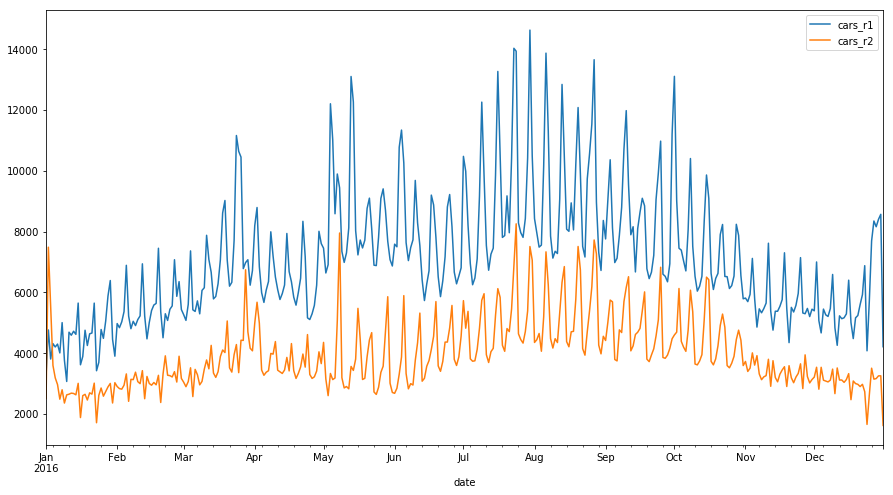

In [14]:
grouped_by_name = df.groupby(['nr'])
import matplotlib.pyplot as plt
number = 1177
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.TimeGrouper('D')])[['cars_r1', 'cars_r2']].sum().reset_index()
station_days.plot(x="date",y=["cars_r1","cars_r2"],figsize = (15,8)) #plotting
#p=station_days.plot(figsize = (15,8)) this also works
plt.show()

## Plot exercise 5

## Scatterplot: Top 3 busiest days per state

In [15]:
df_scatter = df
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.TimeGrouper('D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending=False)
df_clean = df_sorted.groupby(['land']).head(3)
df_clean

,land,date,sum
2772,9,2016-07-29,18445463.0
2835,9,2016-09-30,18217294.0
2758,9,2016-07-15,17778032.5
1371,5,2016-09-30,12854599.0
1222,5,2016-05-04,12686687.5
1231,5,2016-05-13,12656007.0
1737,6,2016-09-30,6058320.0
2103,7,2016-09-30,6015850.0
2026,7,2016-07-15,5982411.0
1660,6,2016-07-15,5962388.0


# Plot the different group of land vs date and show the 3 busiest days using the above DataFrames generated.

You have to just write one line inside the for loop and plot.

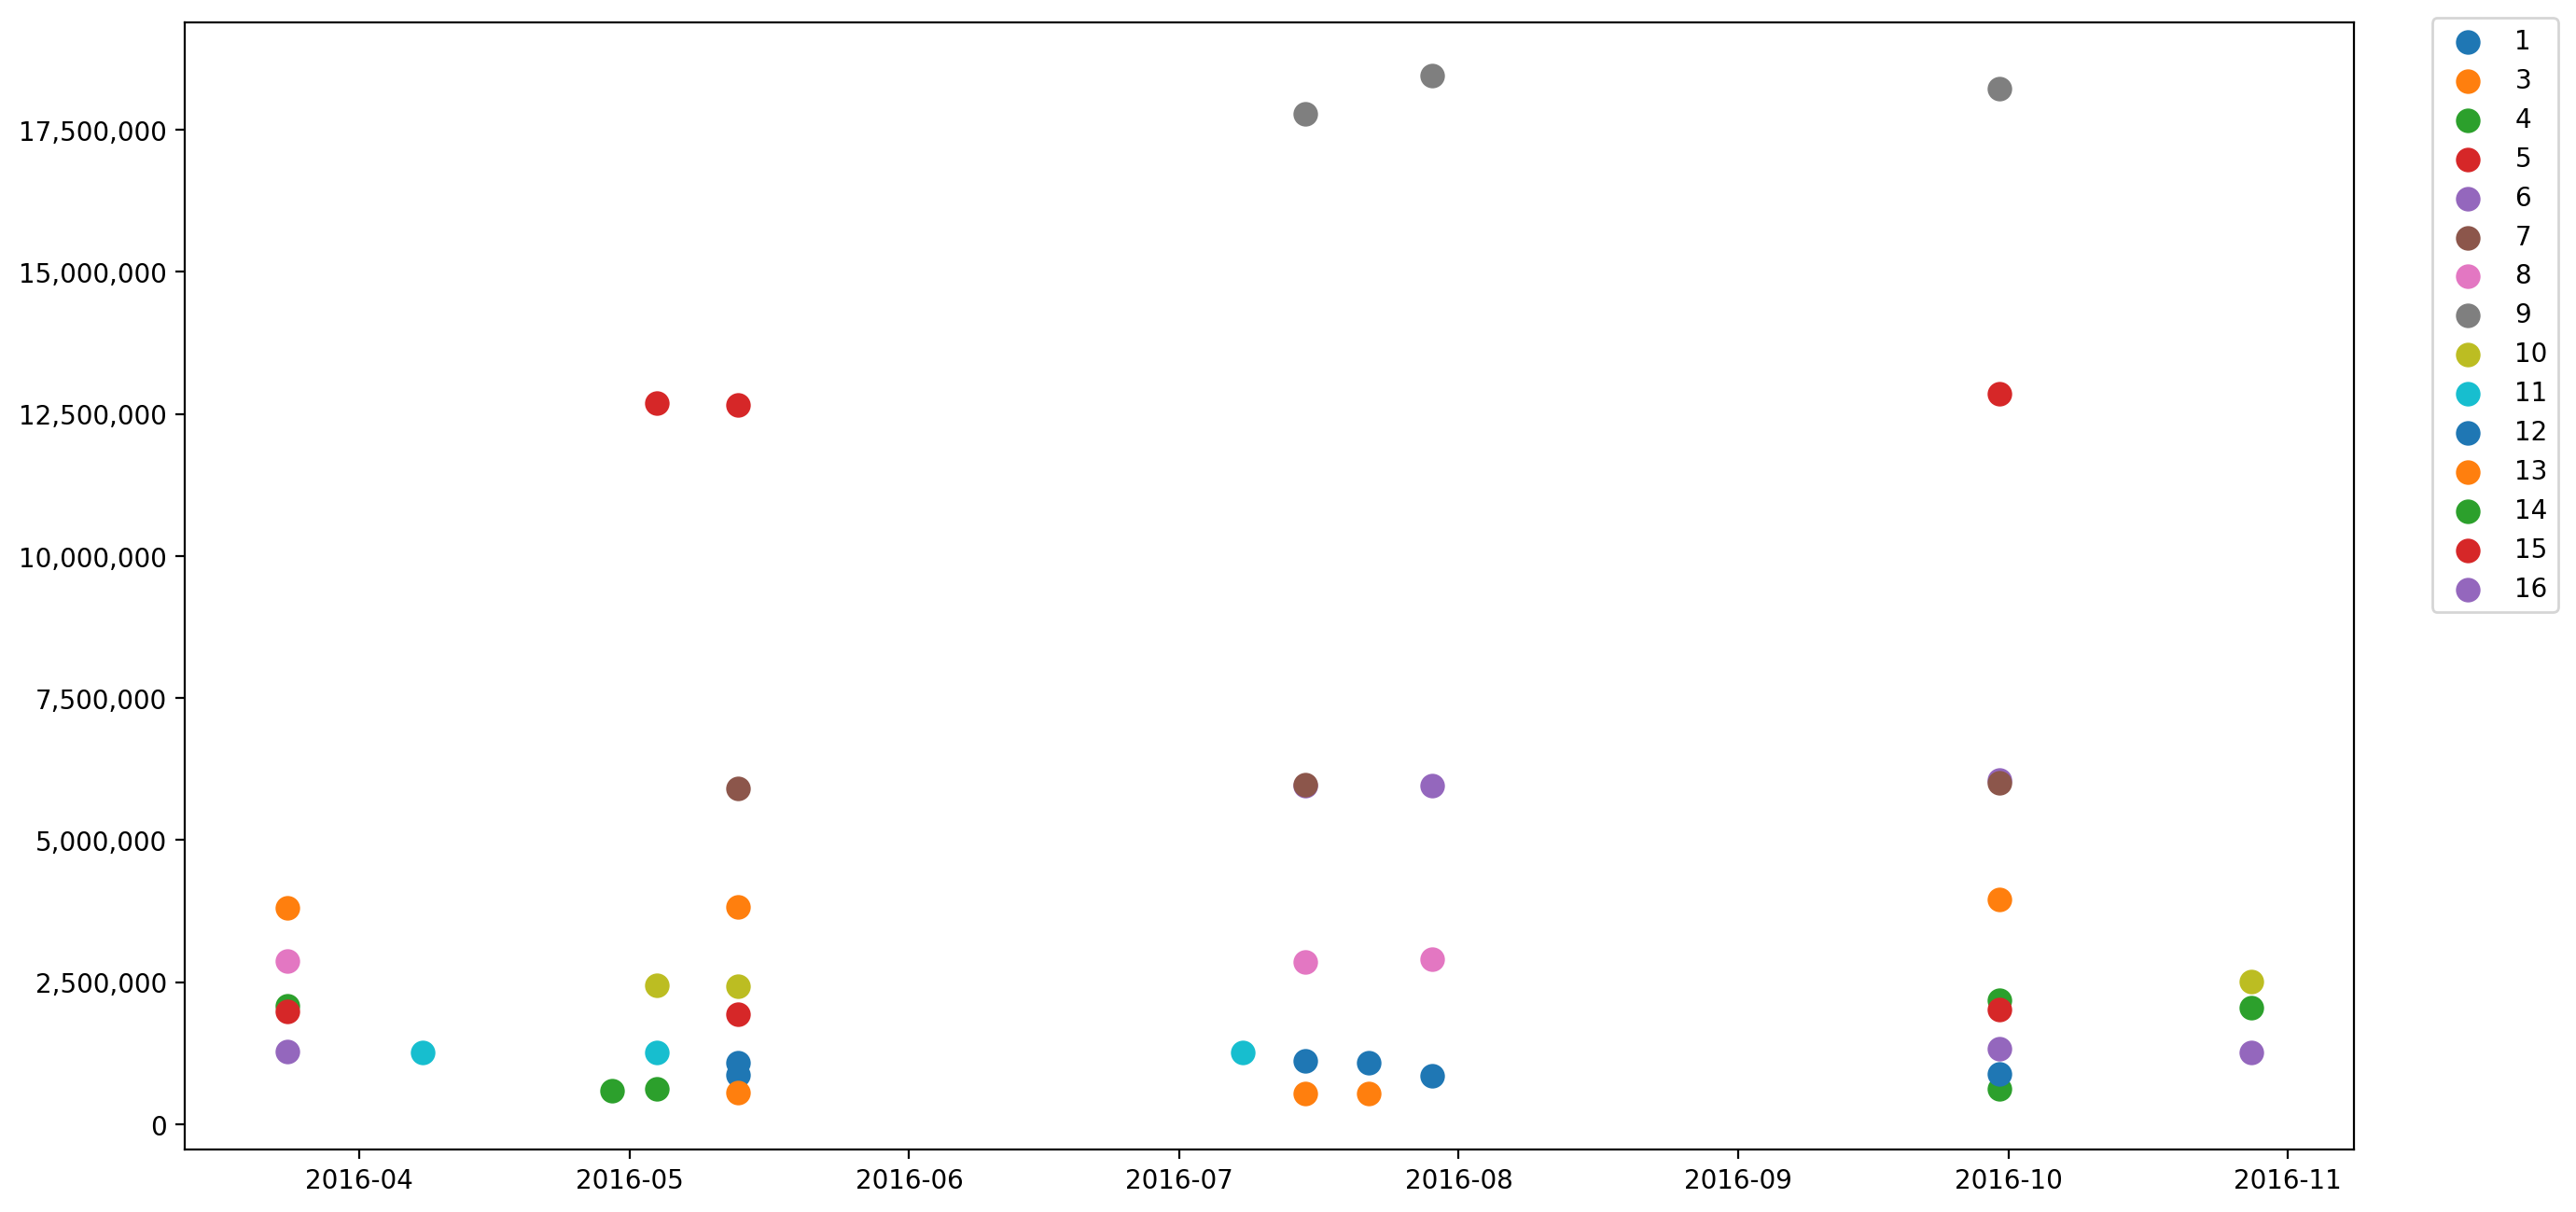

In [16]:
groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    # line to insert here for to plot.
    plt.scatter(list(group['date']),list(group['sum']),label=name,s=72)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.015))
plt.show()

In [ ]:
Image(filename=r'ProblemSet1/plot2.png')